In [1]:
# 📊 Data Handling
import pandas as pd
import numpy as np

# 📈 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px  # Optional: for interactive plots

# 🗺️ Mapping & Geo
import folium
from folium.plugins import HeatMap
import geopandas as gpd

# 🧼 Date/Time Handling
import datetime

# 🧠 Machine Learning (Optional)
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 📂 Utility
import os

☢️ Chernobyl Fallout Analysis – Atmospheric Radiation Across Europe (1986)

🧭 Project Overview

Following the Chernobyl nuclear disaster in April 1986, radioactive isotopes were dispersed across Europe and detected by air monitoring stations in many countries. In this notebook, we analyze real atmospheric concentration data of three key isotopes:
	•	Iodine-131 (I-131) – short-lived (half-life: ~8 days)
	•	Cesium-134 (Cs-134) – medium-lived (half-life: ~2.1 years)
	•	Cesium-137 (Cs-137) – long-lived (half-life: ~30.17 years)

Our goal is to explore how radiation levels evolved geographically and over time, assess the peak fallout in each country, and compare observed data to theoretical decay models.

⸻

📂 Dataset & Preparation

We used a dataset of daily measurements by country, originally recorded in Bq/m³. Initial processing steps included:
	•	Converting date fields to datetime format
	•	Ensuring numeric formatting for each isotope
	•	Mapping 2-letter country codes (e.g. “DE”, “FR”) to full country names
	•	Grouping the data by Date and Country to calculate daily means

⸻

🔍 Exploratory Data Analysis (EDA)

We performed several forms of EDA to understand trends and distributions:

🔄 Rolling Averages by Country

We smoothed fluctuations in daily measurements using 7-day rolling averages and plotted time series for each isotope (I-131, Cs-134, Cs-137) by country.

These visuals revealed:
	•	The timing of fallout arrival in different regions
	•	A rapid rise and decay of I-131 (as expected from its short half-life)
	•	Longer persistence of Cs-137 in the environment

🧭 Spatial Distribution

To visualize geographic patterns, we used:
	•	Bar plots to rank countries by peak measured values
	•	Folium interactive maps with satellite-style basemaps to show marker size and location per country, with isotope concentrations in tooltips

⸻

📉 Radioactive Decay Modeling (Cs-137)

We modeled the expected physical decay of I-131 and compared it to the observed values in the Czech Republic as it had one of the highest exposures.

Using the exponential decay formula:

N(t) = N_0 \cdot e^{-\lambda t}, \quad \lambda = \frac{\ln(2)}{30.17}

We calculated the expected drop in activity since the peak measurement, assuming no further contamination. We normalized observed Cs-137 values and compared them to the theoretical curve.

Key finding:
	•	For countries with only 2–3 months of data, the decay curve appears flat because the time period is too short to observe meaningful decay (Cs-137 half-life is ~30 years).

⸻

⸻

🧠 Key Takeaways
	•	Fallout from Chernobyl was detected across most of Europe
	•	all isotope detection spiked and decayed within a few months, not because the isotopes had already decayed, but becuase they settled into ground and where no longer detectable in air.  
    •	Peak radiation levels and arrival times varied by geography and weather
	•	Short-term monitoring does not capture the full decay behavior of long-lived isotopes

⸻

🧭 Next Steps & Ideas
	•	Build a Power BI dashboard summarizing per-country trends interactively
	•	Use more granular data (if available) to model Cs-137 decay over decades
	•	Compare fallout patterns with meteorological wind data from 1986
	•	Try machine learning to cluster countries based on fallout patterns

⸻


In [2]:
from IPython.display import display
df = pd.read_csv('/kaggle/input/chernobyl-chemical-radiation-csv-country-data/Chernobyl_ Chemical_Radiation.csv')
display(df.head())
print("🧼 Number of Columns:")
display( df.shape)
print("🧼 Nulls Total by Column:")
display(df.isna().sum())

,PAYS,Code,Location,Longitude,Latitude,Date,I_131_(Bq/m3),Cs_134_(Bq/m3),Cs_137_(Bq/m3)
0,SE,1,RISOE,12.07,55.7,86/04/27,1,0,0.24
1,SE,1,RISOE,12.07,55.7,86/04/28,0.0046,0.00054,0.00098
2,SE,1,RISOE,12.07,55.7,86/04/29,0.0147,0.0043,0.0074
3,SE,1,RISOE,12.07,55.7,86/04/29,0.00061,0,0.00009
4,SE,1,RISOE,12.07,55.7,86/04/30,0.00075,0.0001,0.00028


🧼 Number of Columns:


(2051, 9)

🧼 Nulls Total by Column:


PAYS                0
Code                0
Location            0
Longitude           0
Latitude            0
Date                0
I_131_(Bq/m3)      20
Cs_134_(Bq/m3)    154
Cs_137_(Bq/m3)    480
dtype: int64

In [3]:
df.tail(5)

,PAYS,Code,Location,Longitude,Latitude,Date,I_131_(Bq/m3),Cs_134_(Bq/m3),Cs_137_(Bq/m3)
2046,HU,24,BUDAPEST,19.1,47.5,86/05/07,3.7,0.58,1.2
2047,HU,24,BUDAPEST,19.1,47.5,86/05/08,2.2,0.33,0.69
2048,HU,24,BUDAPEST,19.1,47.5,86/05/09,0.75,0.14,0.29
2049,HU,24,BUDAPEST,19.1,47.5,86/05/10,0.054,0.006,0.009
2050,HU,24,BUDAPEST,19.1,47.5,86/05/11,0.051,0.006,0.01


In [4]:
print(df['PAYS'].unique())

['SE' 'DE' 'F' 'IR' 'IT' 'NL' 'GR' 'UK' 'BE' 'ES' 'CH' 'AU' 'FI' 'NO' 'CZ'
 'HU']


In [5]:
# Define mapping from country codes to full names
country_map = {
    'SE': 'Sweden',
    'DE': 'Germany',
    'F': 'France',
    'IR': 'Ireland',
    'IT': 'Italy',
    'NL': 'Netherlands',
    'GR': 'Greece',
    'UK': 'United Kingdom',
    'BE': 'Belgium',
    'ES': 'Spain',
    'CH': 'Switzerland',
    'AU': 'Austria',
    'FI': 'Finland',
    'NO': 'Norway',
    'CZ': 'Czech Republic',
    'HU': 'Hungary'
}

# Create new column 'Country' using the mapping
df['Country'] = df['PAYS'].map(country_map)

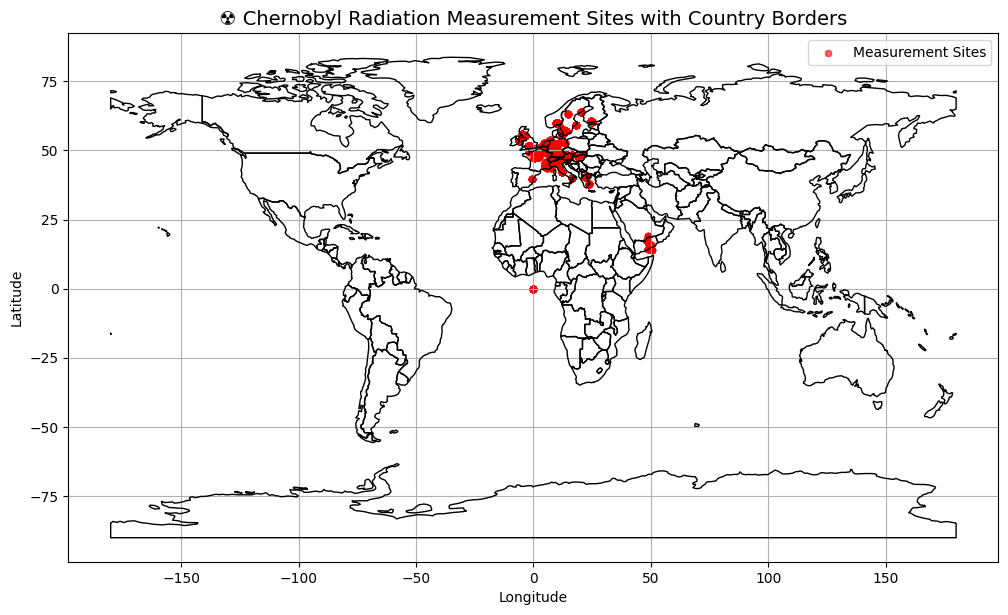

In [6]:

# World basemap

world = gpd.read_file("/kaggle/input/map-data-1")

# Preview
world.head()
# Convert your df to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df.dropna(subset=['Latitude', 'Longitude']),  # drop rows without coordinates
    geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']),
    crs="EPSG:4326"
)

# Plot the map
fig, ax = plt.subplots(figsize=(12, 8))
world.boundary.plot(ax=ax, linewidth=1, edgecolor='black')  # country outlines
gdf.plot(ax=ax, color='red', alpha=0.6, markersize=20, label='Measurement Sites')

plt.title("☢️ Chernobyl Radiation Measurement Sites with Country Borders", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.legend()
plt.show()

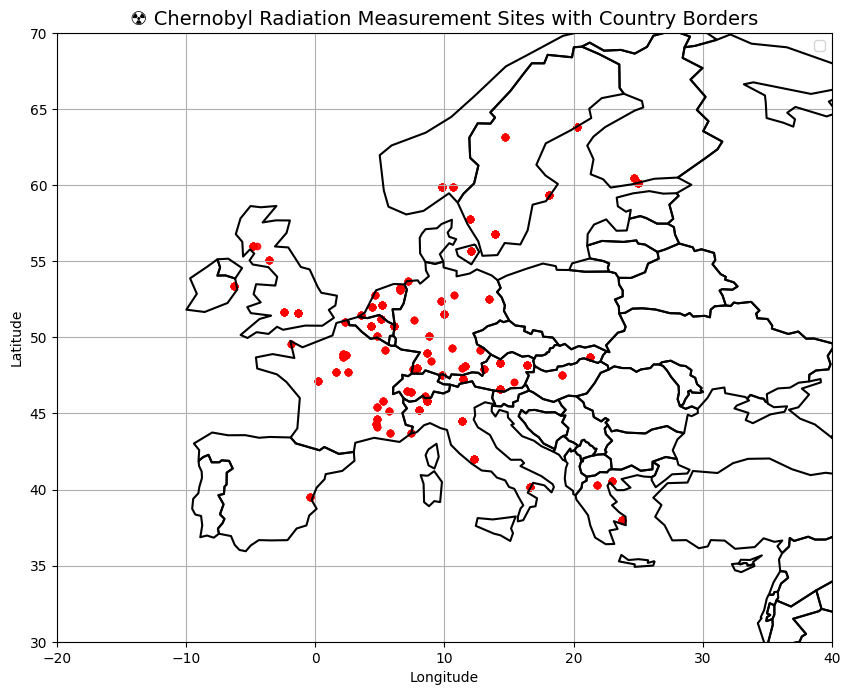

In [7]:
# Load world map shapefile (included in geopandas)
world = gpd.read_file("/kaggle/input/map-data-1")

# Convert your df to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    df.dropna(subset=['Latitude', 'Longitude']),  # drop rows without coordinates
    geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']),
    crs="EPSG:4326"
)
periferal_countries = [
    "Algeria", "Egypt", "Libya",'Greenland', 'Iceland','Sicily', 'Sardinia', 'Malta', "Morocco", "Tunisia", "Sudan", "Mauritania", "Western Sahara"
]

focus_countries = world[~world['SOVEREIGNT'].isin(periferal_countries)]
# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))
focus_countries.boundary.plot(ax=ax, edgecolor='black')
gdf.plot(ax=ax, color='red', alpha=0.6, markersize=20)

# Set longitude (x-axis) and latitude (y-axis) limits
ax.set_xlim(-20, 40)   # adjust for your region (e.g. Eastern Europe)
ax.set_ylim(30, 70)   # adjust for Ukraine, Belarus, Russia

plt.title("☢️ Chernobyl Radiation Measurement Sites with Country Borders", fontsize=14)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.legend()
plt.show()

/tmp/ipykernel_13/663249710.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/tmp/ipykernel_13/663249710.py:56: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


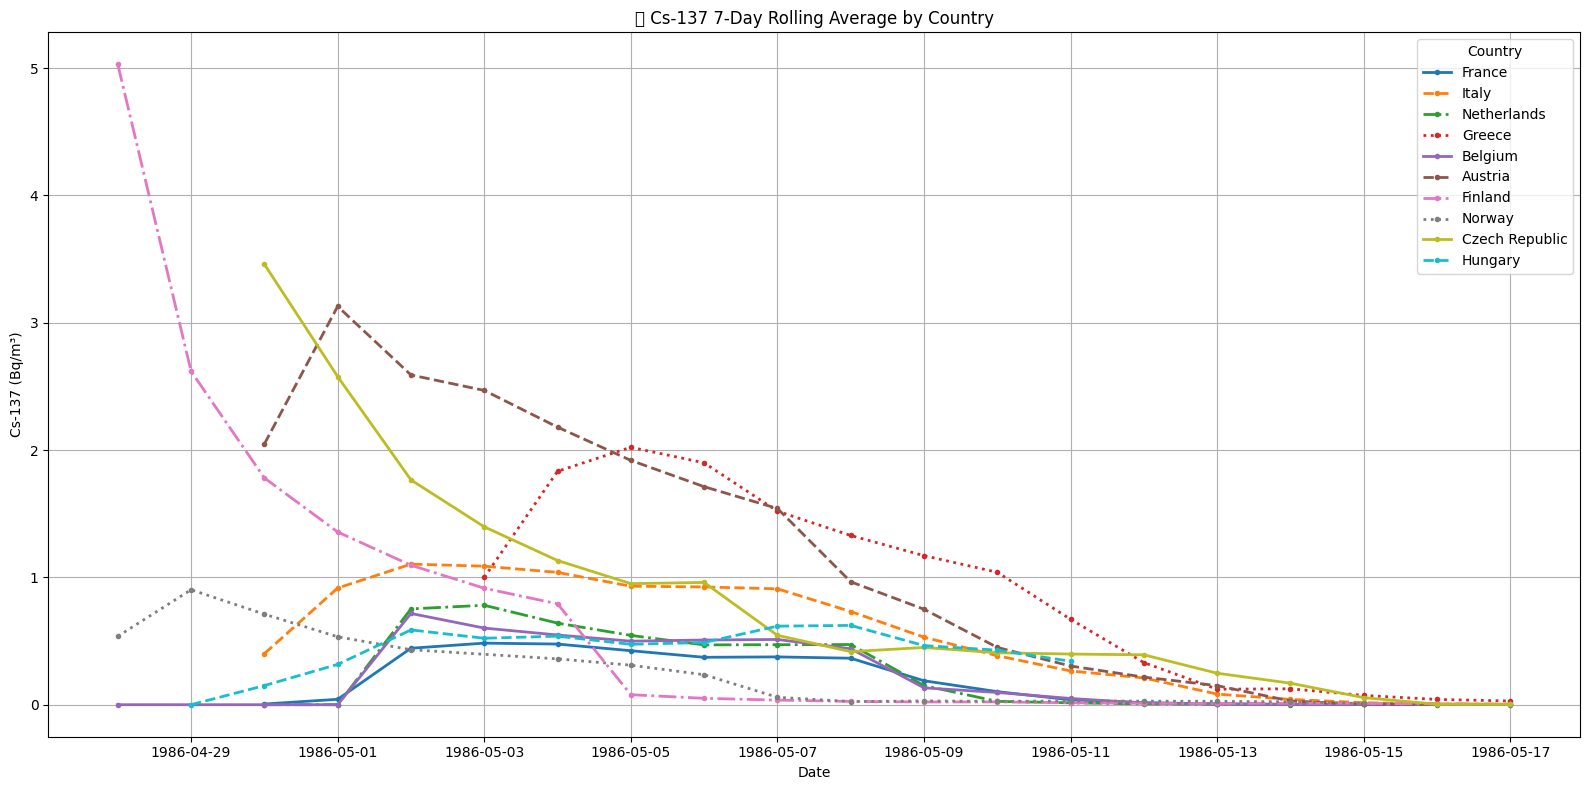

In [8]:

# ✅ List of countries to include in the plot
countries_to_plot = [
    'France',
    'Italy',
    'Netherlands',
    'Greece',
    'Belgium',
    'Austria',
    'Finland',
    'Norway',
    'Czech Republic',
    'Hungary'
]

# ✅ Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# ✅ Ensure radiation columns are numeric
for col in ['I_131_(Bq/m3)', 'Cs_134_(Bq/m3)', 'Cs_137_(Bq/m3)']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ✅ Group by Date and Country
df_grouped = df.groupby(['Date', 'Country'])[['I_131_(Bq/m3)', 'Cs_134_(Bq/m3)', 'Cs_137_(Bq/m3)']].mean().reset_index()

# 🗓️ Filter date range
start_date = '1986-04-01'
end_date = '1986-05-17'

plt.figure(figsize=(16, 8))
colors = sns.color_palette("tab10", n_colors=len(countries_to_plot))
linestyles = ['-', '--', '-.', ':'] * 3

for i, country in enumerate(countries_to_plot):
    country_data = df_grouped[
        (df_grouped['Country'] == country) &
        (df_grouped['Date'] >= '1986-04-01') &
        (df_grouped['Date'] <= '1986-05-17')
    ].sort_values('Date')

    rolling = country_data['Cs_137_(Bq/m3)'].rolling(window=7, min_periods=1).mean()

    plt.plot(country_data['Date'], rolling,
             label=country,
             color=colors[i],
             linestyle=linestyles[i],
             linewidth=2,
             marker='o',
             markersize=3)

plt.title("📉 Cs-137 7-Day Rolling Average by Country")
plt.xlabel("Date")
plt.ylabel("Cs-137 (Bq/m³)")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_13/3839988483.py:57: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


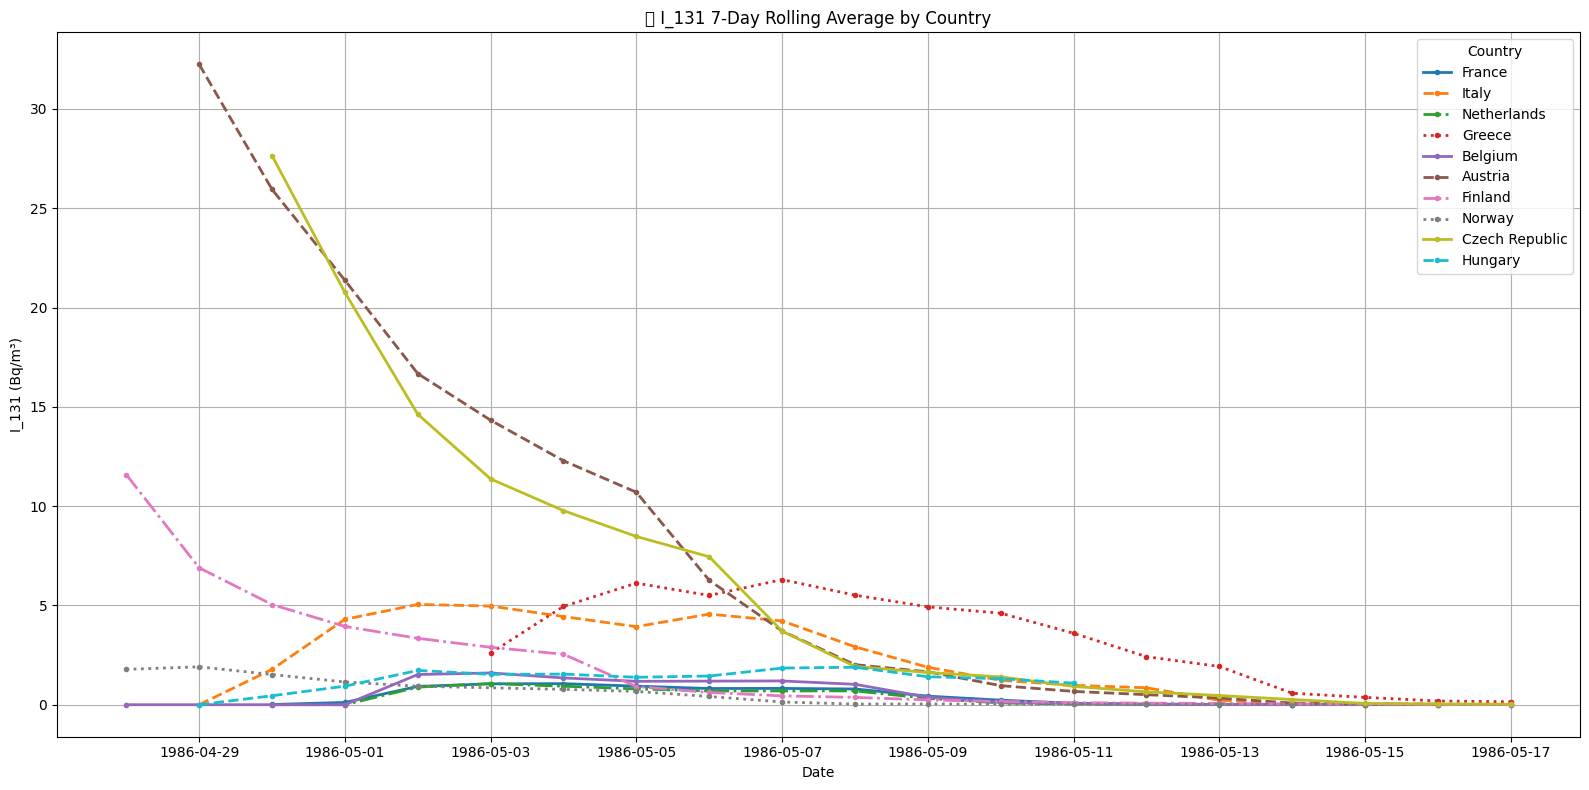

In [9]:


# ✅ List of countries to include in the plot
countries_to_plot = [
    'France',
    'Italy',
    'Netherlands',
    'Greece',
    'Belgium',
    'Austria',
    'Finland',
    'Norway',
    'Czech Republic',
    'Hungary'
]

# ✅ Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# ✅ Ensure radiation columns are numeric
for col in ['I_131_(Bq/m3)', 'Cs_134_(Bq/m3)', 'Cs_137_(Bq/m3)']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ✅ Group by Date and Country
df_grouped = df.groupby(['Date', 'Country'])[['I_131_(Bq/m3)', 'Cs_134_(Bq/m3)', 'Cs_137_(Bq/m3)']].mean().reset_index()

# 🗓️ Filter date range
start_date = '1986-04-01'
end_date = '1986-05-17'


plt.figure(figsize=(16, 8))
colors = sns.color_palette("tab10", n_colors=len(countries_to_plot))
linestyles = ['-', '--', '-.', ':'] * 3

for i, country in enumerate(countries_to_plot):
    country_data = df_grouped[
        (df_grouped['Country'] == country) &
        (df_grouped['Date'] >= '1986-04-01') &
        (df_grouped['Date'] <= '1986-05-17')
    ].sort_values('Date')

    rolling = country_data['I_131_(Bq/m3)'].rolling(window=7, min_periods=1).mean()

    plt.plot(country_data['Date'], rolling,
             label=country,
             color=colors[i],
             linestyle=linestyles[i],
             linewidth=2,
             marker='o',
             markersize=3)

plt.title("📉 I_131 7-Day Rolling Average by Country")
plt.xlabel("Date")
plt.ylabel("I_131 (Bq/m³)")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_13/1507368559.py:56: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


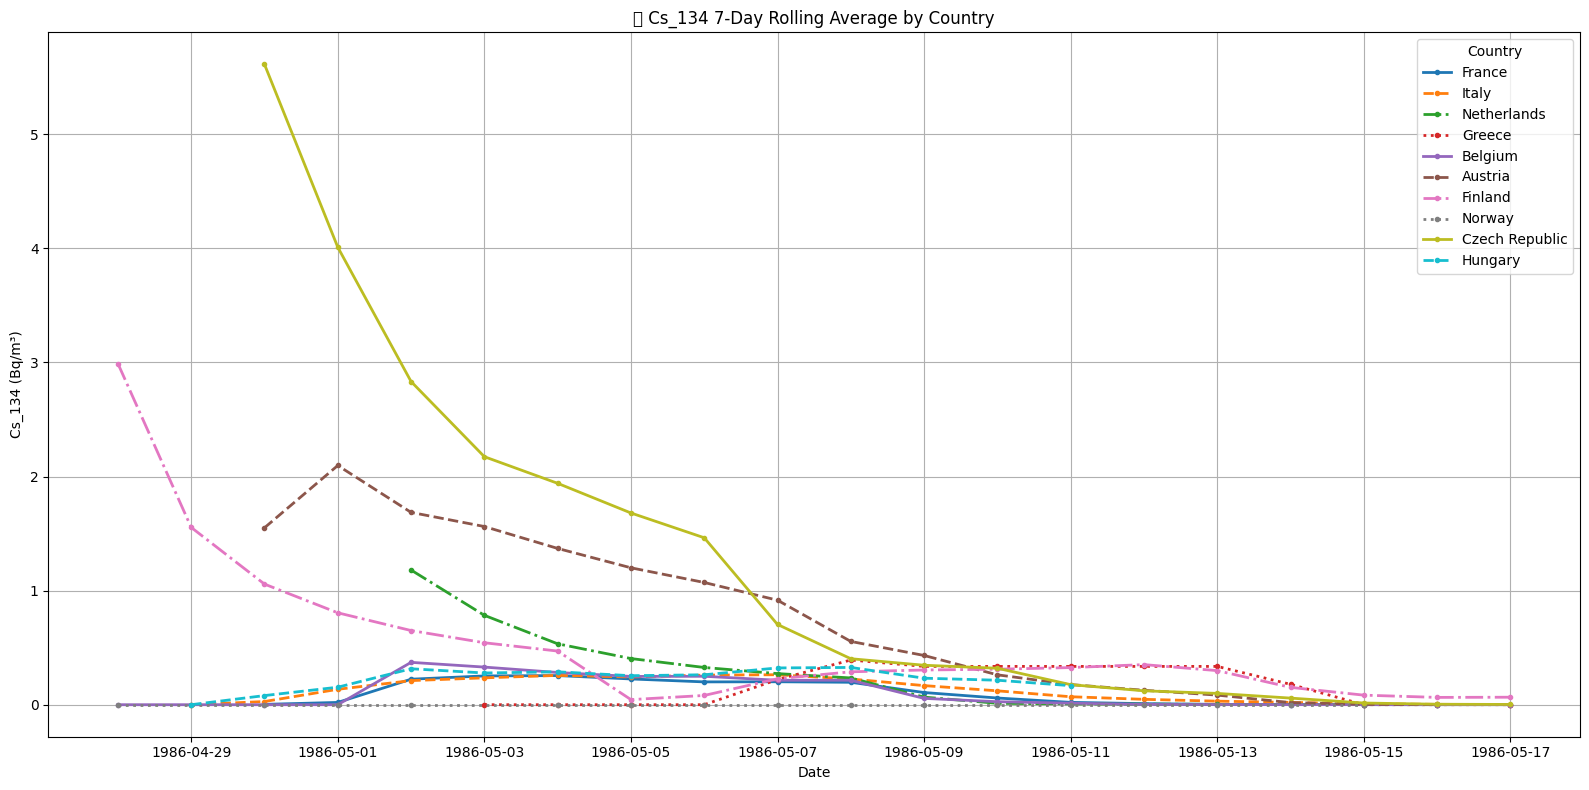

In [10]:
# ✅ List of countries to include in the plot
countries_to_plot = [
    'France',
    'Italy',
    'Netherlands',
    'Greece',
    'Belgium',
    'Austria',
    'Finland',
    'Norway',
    'Czech Republic',
    'Hungary'
]

# ✅ Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

# ✅ Ensure radiation columns are numeric
for col in ['I_131_(Bq/m3)', 'Cs_134_(Bq/m3)', 'Cs_137_(Bq/m3)']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# ✅ Group by Date and Country
df_grouped = df.groupby(['Date', 'Country'])[['I_131_(Bq/m3)', 'Cs_134_(Bq/m3)', 'Cs_137_(Bq/m3)']].mean().reset_index()

# 🗓️ Filter date range
start_date = '1986-04-01'
end_date = '1986-05-17'

plt.figure(figsize=(16, 8))
colors = sns.color_palette("tab10", n_colors=len(countries_to_plot))
linestyles = ['-', '--', '-.', ':'] * 3

for i, country in enumerate(countries_to_plot):
    country_data = df_grouped[
        (df_grouped['Country'] == country) &
        (df_grouped['Date'] >= '1986-04-01') &
        (df_grouped['Date'] <= '1986-05-17')
    ].sort_values('Date')

    rolling = country_data['Cs_134_(Bq/m3)'].rolling(window=7, min_periods=1).mean()

    plt.plot(country_data['Date'], rolling,
             label=country,
             color=colors[i],
             linestyle=linestyles[i],
             linewidth=2,
             marker='o',
             markersize=3)

plt.title("📉 Cs_134 7-Day Rolling Average by Country")
plt.xlabel("Date")
plt.ylabel("Cs_134 (Bq/m³)")
plt.legend(title="Country")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipykernel_13/3507986372.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


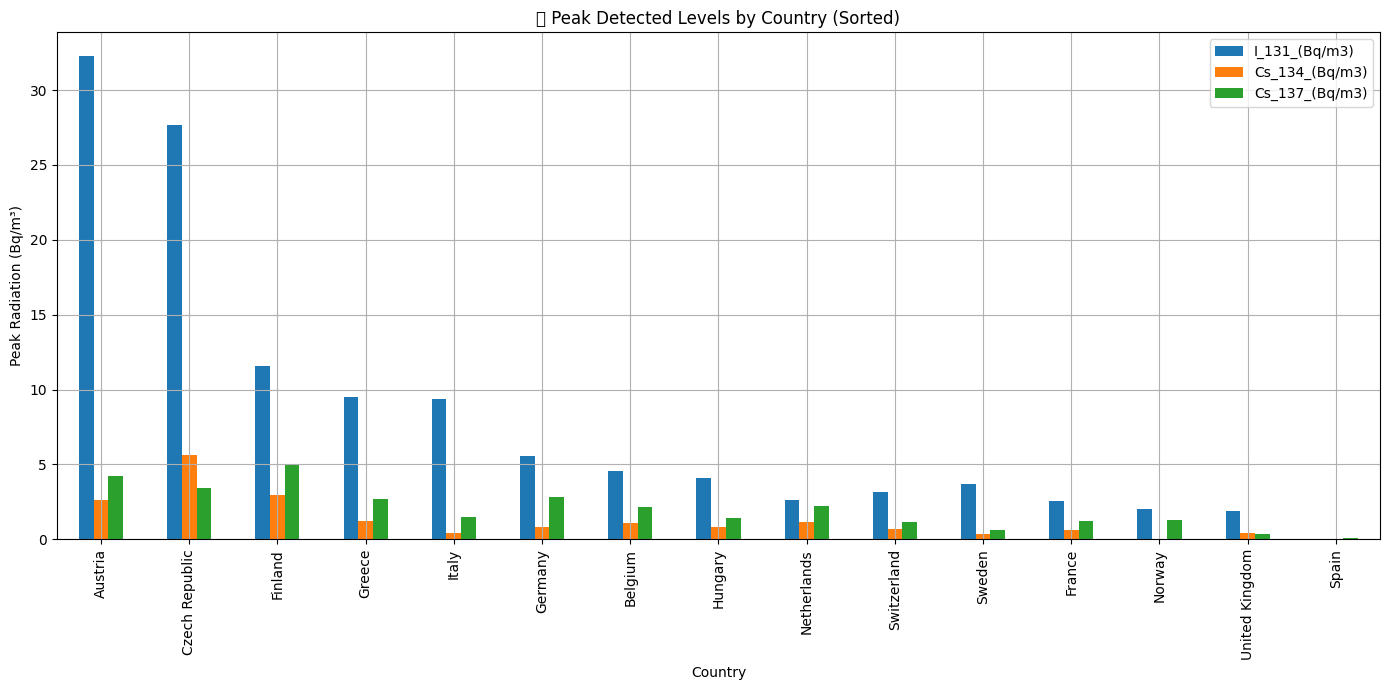

In [11]:
# ✅ Get max value per isotope per country
df_peak = df_grouped.groupby('Country')[['I_131_(Bq/m3)', 'Cs_134_(Bq/m3)', 'Cs_137_(Bq/m3)']].max()

# ✅ Calculate total radiation across all isotopes for sorting
df_peak['Total'] = df_peak.sum(axis=1)

# Remove Ireland
df_peak = df_peak[df_peak.index != 'Ireland']

# ✅ Sort by total descending
df_peak_sorted = df_peak.sort_values('Total', ascending=False)

# ✅ Drop the 'Total' column before plotting
df_peak_sorted.drop(columns='Total').plot(kind='bar', figsize=(14, 7), title='📊 Peak Detected Levels by Country (Sorted)')
plt.ylabel("Peak Radiation (Bq/m³)")
plt.xlabel("Country")
plt.grid(True)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/tmp/ipykernel_13/1094707760.py:23: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128338 (\N{CLOCK FACE THREE OCLOCK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


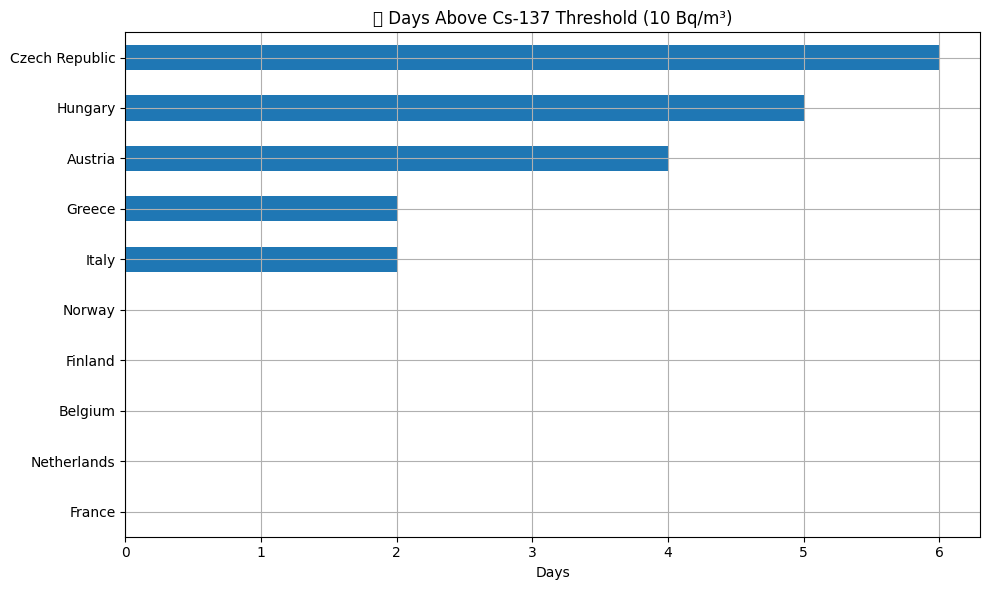

In [12]:
# 🟠 Set threshold for Cs-137 (e.g., 10 Bq/m³)
threshold = 1
decay_times = {}

for country in countries_to_plot:
    country_data = df_grouped[df_grouped['Country'] == country].sort_values('Date')
    above_threshold = country_data[country_data['Cs_137_(Bq/m3)'] > threshold]
    
    if not above_threshold.empty:
        first_date = above_threshold['Date'].iloc[0]
        last_date = above_threshold['Date'].iloc[-1]
        decay_days = (last_date - first_date).days
        decay_times[country] = decay_days

# ✅ Convert to Series and plot
pd.Series(decay_times).sort_values().plot(
    kind='barh',
    figsize=(10, 6),
    title='🕒 Days Above Cs-137 Threshold (10 Bq/m³)'
)

plt.xlabel("Days")
plt.tight_layout()
plt.grid(True)
plt.show()

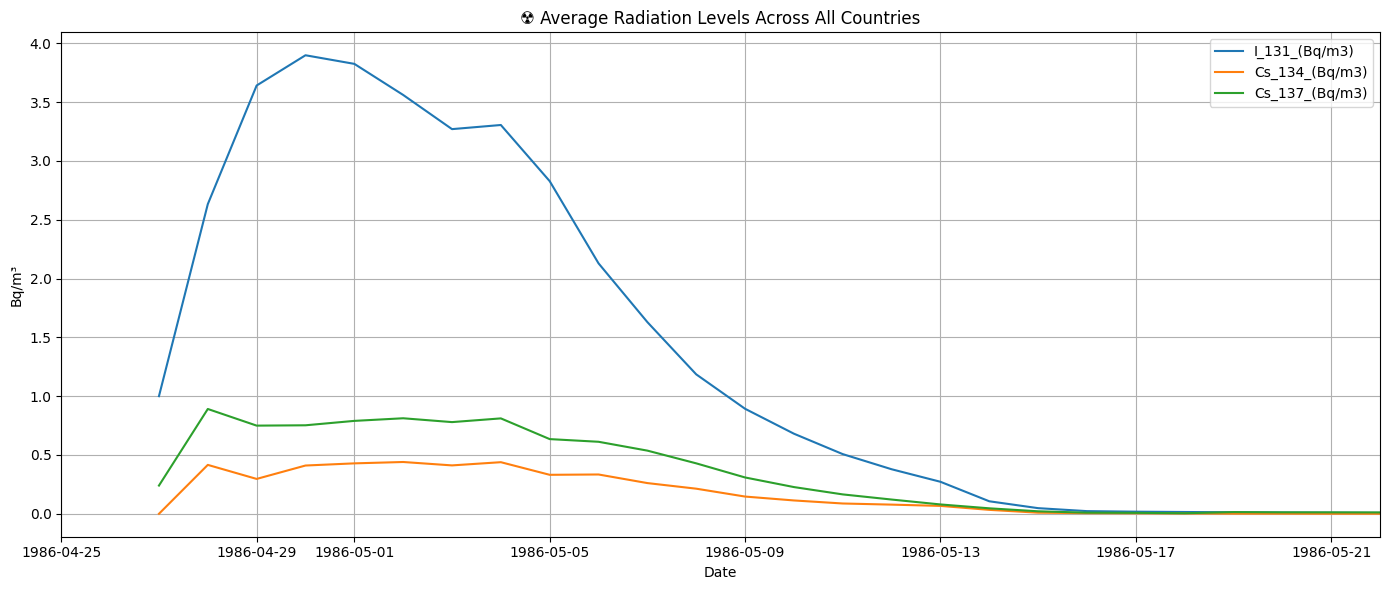

In [13]:
plt.figure(figsize=(14, 6))

for isotope in ['I_131_(Bq/m3)', 'Cs_134_(Bq/m3)', 'Cs_137_(Bq/m3)']:
    total_avg = df_grouped.groupby('Date')[isotope].mean().rolling(7, min_periods=1).mean()
    plt.plot(total_avg, label=isotope)

plt.title("☢️ Average Radiation Levels Across All Countries")
plt.xlabel("Date")
plt.ylabel("Bq/m³")
plt.legend()
plt.grid(True)

# Set start and end of visible x-axis range
plt.xlim(pd.to_datetime('1986-04-25'), pd.to_datetime('1986-05-22'))

plt.tight_layout()
plt.show()

In [14]:
import plotly.express as px

# Your data: country-level Cs-137 peak
df_peak = df_grouped.groupby('Country')['Cs_137_(Bq/m3)'].max().reset_index()

fig = px.choropleth(
    df_peak,
    locations="Country",
    locationmode="country names",
    color="Cs_137_(Bq/m3)",
    color_continuous_scale="Viridis",
    title="🌍 Peak Cs-137 by Country (Europe View)",
    scope="europe"  # 👈 ZOOM TO EUROPE
)

fig.update_layout(geo=dict(
    projection_scale=1.5,  # Optional: zoom level
    center={"lat": 55, "lon": 15},  # Optional: re-center map
))

fig.show()

In [15]:


df_peak_i131 = df_grouped.groupby('Country')['I_131_(Bq/m3)'].max().reset_index()

fig_i131 = px.choropleth(
    df_peak_i131,
    locations="Country",
    locationmode="country names",
    color="I_131_(Bq/m3)",
    color_continuous_scale="Viridis",
    title="🌍 Peak I-131 by Country (Europe View)",
    scope="europe"
)

fig_i131.update_layout(geo=dict(
    projection_scale=1.5,
    center={"lat": 55, "lon": 15}
))

fig_i131.show()

In [16]:
df_peak_cs134 = df_grouped.groupby('Country')['Cs_134_(Bq/m3)'].max().reset_index()

fig_cs134 = px.choropleth(
    df_peak_cs134,
    locations="Country",
    locationmode="country names",
    color="Cs_134_(Bq/m3)",
    color_continuous_scale="Viridis",
    title="🌍 Peak Cs-134 by Country (Europe View)",
    scope="europe"
)

fig_cs134.update_layout(geo=dict(
    projection_scale=1.5,
    center={"lat": 55, "lon": 15}
))

fig_cs134.show()

In [17]:
# Use any isotope you like, here's Cs-137 as example
df_peak = df_grouped.groupby('Country')['Cs_137_(Bq/m3)'].max().reset_index()

fig = px.choropleth(
    df_peak,
    locations="Country",
    locationmode="country names",
    color="Cs_137_(Bq/m3)",
    color_continuous_scale="Plasma",
    title="🌐 Cs-137 Peak Levels (Globe View)",
)

fig.update_geos(
    projection_type="orthographic",  # 👈 Globe-style projection
    showland=True,
    showocean=True,
    oceancolor="LightBlue",
    landcolor="white",
    showframe=False,
)

fig.update_layout(
    geo=dict(
        center={"lat": 50, "lon": 20},  # Focus on Europe
        projection_rotation={"lat": 50, "lon": 20}
    )
)

fig.show()

/tmp/ipykernel_13/783481358.py:38: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.



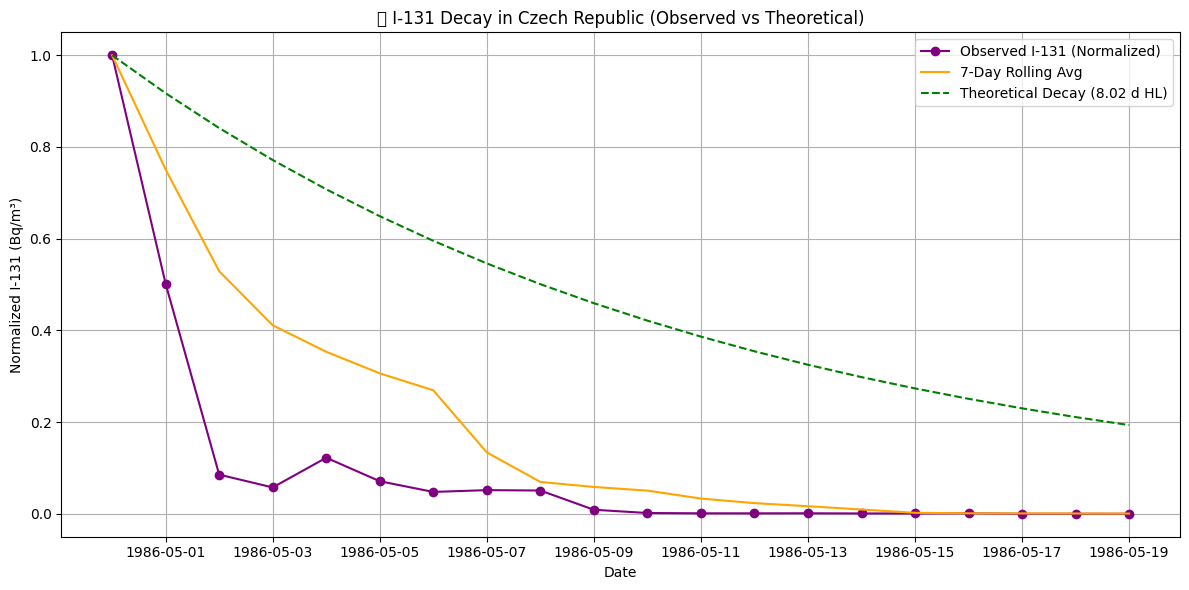

In [18]:


# 📍 Filter Czech Republic data up to 20 May 1986
df_iodine = df_grouped[
    (df_grouped['Country'] == 'Czech Republic') &
    (df_grouped['Date'] <= '1986-05-20')
].sort_values('Date')

# 🧼 Drop NaNs
df_iodine = df_iodine[['Date', 'I_131_(Bq/m3)']].dropna().reset_index(drop=True)

# ✅ Normalize I-131 to peak
df_iodine['I_131_norm'] = df_iodine['I_131_(Bq/m3)'] / df_iodine['I_131_(Bq/m3)'].max()

# ✅ Add 7-day rolling average
df_iodine['I_131_rolling'] = df_iodine['I_131_norm'].rolling(window=7, min_periods=1).mean()

# 🕒 Time since peak (in days)
peak_date = df_iodine.loc[df_iodine['I_131_norm'].idxmax(), 'Date']
df_iodine['days_since_peak'] = (df_iodine['Date'] - peak_date).dt.days

# 🧪 Theoretical decay curve
half_life = 8.02
decay_const = np.log(2) / half_life
df_iodine['expected_decay'] = np.exp(-decay_const * df_iodine['days_since_peak'])

# 📊 Plot all three
plt.figure(figsize=(12, 6))

plt.plot(df_iodine['Date'], df_iodine['I_131_norm'], label='Observed I-131 (Normalized)', marker='o', color='purple')
plt.plot(df_iodine['Date'], df_iodine['I_131_rolling'], label='7-Day Rolling Avg', color='orange', linestyle='-')
plt.plot(df_iodine['Date'], df_iodine['expected_decay'], label='Theoretical Decay (8.02 d HL)', linestyle='--', color='green')

# 🎨 Format
plt.title("📉 I-131 Decay in Czech Republic (Observed vs Theoretical)")
plt.xlabel("Date")
plt.ylabel("Normalized I-131 (Bq/m³)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()